Zbiór danych oraz modele, cechy na podstawie artykułu https://www.researchgate.net/publication/355832899_Music_Emotion_Recognition_with_Machine_Learning_Based_on_Audio_Features

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import os
import importlib

from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model, load_model, Sequential

# from keras import Sequential
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
# import keras_tuner as kt

import music_tools

In [2]:
song_path = kagglehub.dataset_download("blaler/turkish-music-emotion-dataset")
print("Path to dataset files:", song_path)

Path to dataset files: C:\Users\Gabi\.cache\kagglehub\datasets\blaler\turkish-music-emotion-dataset\versions\3


In [5]:
data = []

path_happy = os.path.join(song_path, 'happy')
for file in os.listdir(path_happy):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_happy, filename),
        'emotion': 'happy',
    })

path_angry = os.path.join(song_path, 'angry')
for file in os.listdir(path_angry):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_angry, filename),
        'emotion': 'angry',
    })

path_sad = os.path.join(song_path, 'sad')
for file in os.listdir(path_sad):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_sad, filename),
        'emotion': 'sad',
    })

path_relax = os.path.join(song_path, 'relax')
for file in os.listdir(path_relax):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_relax, filename),
        'emotion': 'relax',
    })

df_turkish = pd.DataFrame.from_records(data)
df_turkish

path emotion
0    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy
1    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy
2    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy
3    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy
4    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy
..                                                 ...     ...
395  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax
396  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax
397  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax
398  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax
399  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax

[400 rows x 2 columns]

Ekstrakcja cech z plików audio

In [4]:
features_list = []
for i, song_path in enumerate(df_turkish['path']):
    extracted = music_tools.extract_features(song_path)
    features_list.append(extracted)
    print(f'{i} / {len(df_turkish)}')

features_df = pd.DataFrame(features_list)

0 / 400
1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400


In [5]:
df_turkish = pd.concat([df_turkish, features_df], axis=1)
df_turkish

path emotion  rmse_mean  \
0    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy   0.182018   
1    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy   0.110597   
2    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy   0.256198   
3    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy   0.122220   
4    C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   happy   0.201407   
..                                                 ...     ...        ...   
395  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax   0.124007   
396  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax   0.195241   
397  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax   0.051606   
398  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax   0.056647   
399  C:\Users\Gabi\.cache\kagglehub\datasets\blaler...   relax   0.036137   

     low_energy  tempo_mean  spectral_centroid_mean  spectral_entropy  \
0      0.530754  135.999178             3139.515121          4.026297   
1      0.550870  107.666016             2050.031017          4.332906   
2      0.618956   97.508844             3882.133726          4.596831   
3      0.535783   82.031250             3041.992248          5.445467   
4      0.579110  129.199219             2428.319134          4.531731   
..          ...         ...                     ...               ...   
395    0.471177  109.956782             2446.415686          3.429771   
396    0.495164   84.720799             1770.504463          3.438049   
397    0.551644   59.401940             1497.827872          3.091444   
398    0.513545  135.999178             1812.355375          3.456714   
399    0.536378  109.956782             1495.356832          3.445112   

     zcr_mean  mfcc_mean_1  mfcc_mean_2  ...  chroma_stft_mean_3  \
0    0.058564  -127.231964   130.918716  ...            0.548985   
1    0.051985  -199.692886   171.635818  ...            0.583749   
2    0.096199   -81.960808   112.783768  ...            0.514492   
3    0.097444  -132.773239   144.922882  ...            0.298256   
4    0.054150  -112.031563   163.424347  ...            0.329135   
..        ...          ...          ...  ...                 ...   
395  0.040156  -235.066284   135.998505  ...            0.377753   
396  0.032178  -201.283081   167.863998  ...            0.290100   
397  0.028412  -356.165283   160.428696  ...            0.327510   
398  0.025118  -326.539185   155.308380  ...            0.297711   
399  0.029095  -366.283661   158.678192  ...            0.206323   

     chroma_stft_mean_4  chroma_stft_mean_5  chroma_stft_mean_6  \
0              0.442507            0.413742            0.396137   
1              0.613214            0.580578            0.621760   
2              0.444701            0.524703            0.488757   
3              0.364022            0.504144            0.357769   
4              0.381885            0.522421            0.486155   
..                  ...                 ...                 ...   
395            0.378257            0.430065            0.401265   
396            0.321287            0.480864            0.505111   
397            0.256320            0.246466            0.225199   
398            0.300983            0.325931            0.355852   
399            0.225406            0.308832            0.329266   

     chroma_stft_mean_7  chroma_stft_mean_8  chroma_stft_mean_9  \
0              0.342646            0.350196            0.321331   
1              0.511587            0.503613            0.408076   
2              0.411683            0.433423            0.483044   
3              0.422638            0.486940            0.513909   
4              0.255896            0.240659            0.208797   
..                  ...                 ...                 ...   
395            0.433089            0.532008            0.643993   
396            0.400763            0.403689            0.431553   
397            0.269421

In [59]:
df_turkish.to_pickle('resources/df_turkish.pkl')

In [4]:
df_turkish = pd.read_pickle('resources/df_turkish.pkl')

In [3]:
X = df_turkish.drop(columns=['emotion', 'path'])
y = df_turkish['emotion']

In [4]:
le = LabelEncoder()
y_en = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42, stratify=y_en)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 32)
(320,)
(80, 32)
(80,)


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.725
              precision    recall  f1-score   support

       angry       0.81      0.85      0.83        20
       happy       0.71      0.85      0.77        20
       relax       0.69      0.55      0.61        20
         sad       0.68      0.65      0.67        20

    accuracy                           0.72        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



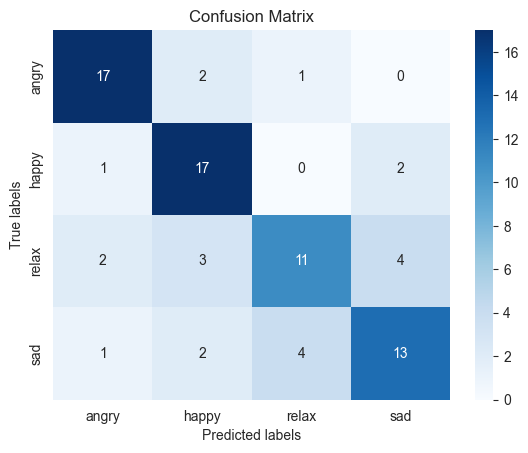

In [49]:
music_tools.show_classification_results(y_pred, y_test, le)

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy:  0.6625
              precision    recall  f1-score   support

       angry       0.94      0.75      0.83        20
       happy       0.67      0.90      0.77        20
       relax       0.54      0.70      0.61        20
         sad       0.55      0.30      0.39        20

    accuracy                           0.66        80
   macro avg       0.67      0.66      0.65        80
weighted avg       0.67      0.66      0.65        80



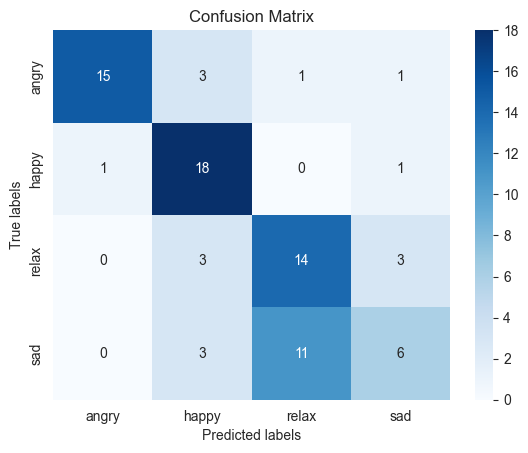

In [51]:
music_tools.show_classification_results(y_pred, y_test, le)

In [52]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Accuracy:  0.7375
              precision    recall  f1-score   support

       angry       0.84      0.80      0.82        20
       happy       0.73      0.80      0.76        20
       relax       0.78      0.70      0.74        20
         sad       0.62      0.65      0.63        20

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



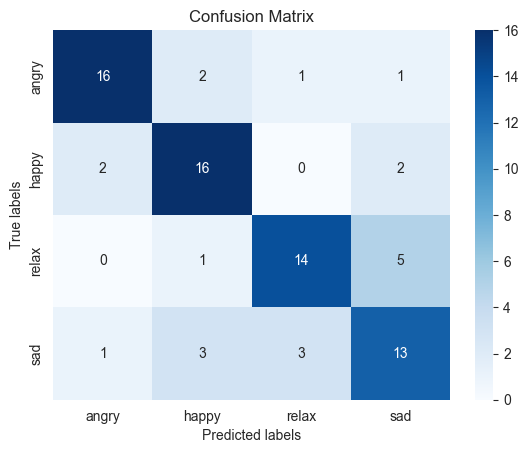

In [53]:
music_tools.show_classification_results(y_pred, y_test, le)

Accuracy:  0.6875
              precision    recall  f1-score   support

       angry       0.84      0.80      0.82        20
       happy       0.63      0.85      0.72        20
       relax       0.67      0.40      0.50        20
         sad       0.64      0.70      0.67        20

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.68        80
weighted avg       0.69      0.69      0.68        80



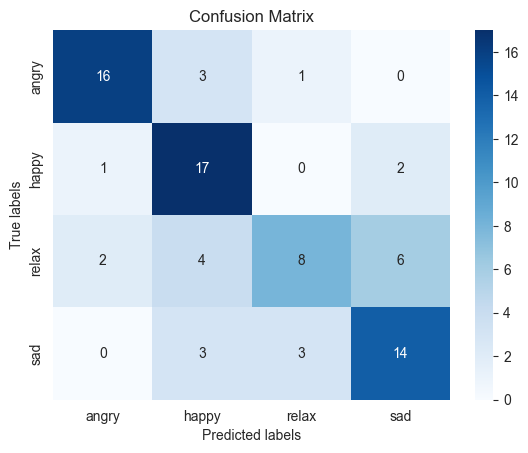

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.base import BaseEstimator, ClassifierMixin, clone


class MedianVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        self.models_ = [clone(clf).fit(X, y) for clf in self.classifiers]
        return self

    def predict(self, X):
        all_preds = np.asarray([model.predict(X) for model in self.models_])
        return np.median(all_preds, axis=0).round().astype(int)  # zakłada klasy 0,1,2,...

# Przygotuj modele
models = [
    SVC(C=0.5, kernel='linear', probability=False),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=200),
    GaussianNB(),
    LinearDiscriminantAnalysis()
]

# Klasyfikator głosujący
voter = MedianVotingClassifier(models)
voter.fit(X_train, y_train)
y_pred = voter.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

In [55]:
num_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1],)

model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,508 (52.77 KB)

 Trainable params: 13,124 (51.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [56]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2069 - loss: 2.4376 - val_accuracy: 0.4625 - val_loss: 1.2132
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4662 - loss: 1.3733 - val_accuracy: 0.6875 - val_loss: 1.0274
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5797 - loss: 0.9953 - val_accuracy: 0.7000 - val_loss: 0.9238
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6222 - loss: 0.9455 - val_accuracy: 0.7250 - val_loss: 0.8671
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6866 - loss: 0.8022 - val_accuracy: 0.7125 - val_loss: 0.8254
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6801 - loss: 0.8342 - val_accuracy: 0.7250 - val_loss: 0.7930
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7278 - loss: 0.7616 - val_accuracy: 0.7375 - val_loss: 0.7589
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7744 - loss: 0.6328 - val_accuracy: 0.

Accuracy:  0.775
              precision    recall  f1-score   support

       angry       0.90      0.90      0.90        20
       happy       0.77      0.85      0.81        20
       relax       0.80      0.60      0.69        20
         sad       0.65      0.75      0.70        20

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80



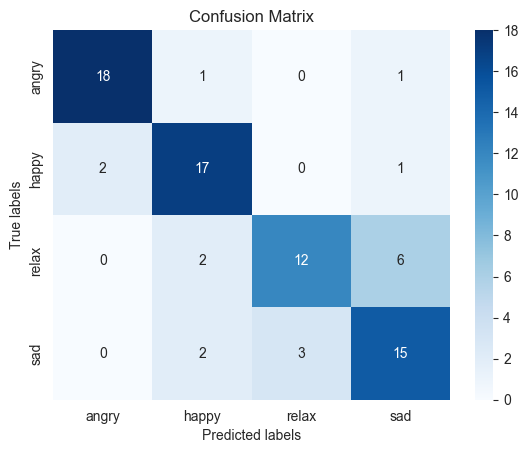

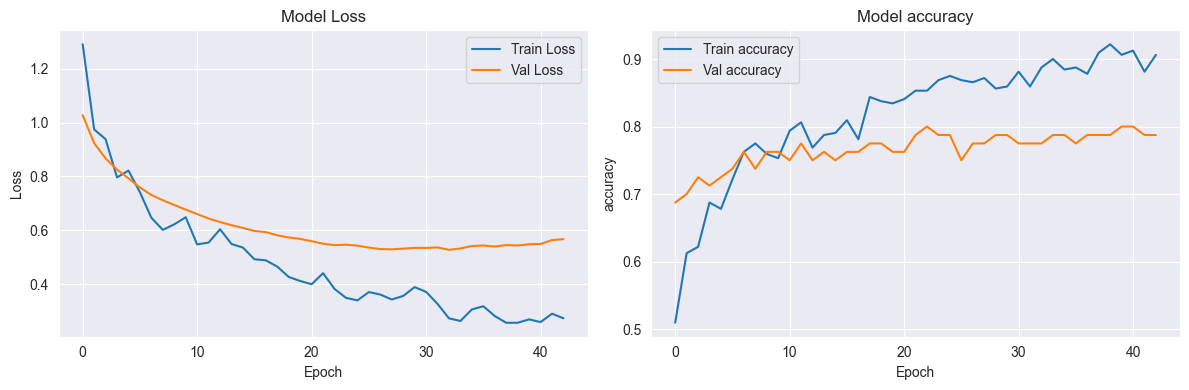

In [59]:
music_tools.show_classification_results(y_pred, y_test, le)
music_tools.plot_trainig_history(history)

In [38]:
def build_model(hp):
    model = Sequential()

    # pierwsza warstwa
    model.add(Dense(
        units=hp.Int("units_input", min_value=32, max_value=256, step=32),
        activation="relu",
        input_shape=(X_train.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float("dropout_input", 0.0, 0.5, step=0.1)))

    # ukryte warstwy
    for i in range(hp.Int("num_layers", 1, 3)):  # 1–3 warstwy ukryte
        model.add(Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
            activation="relu"
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f"dropout_{i}", 0.0, 0.5, step=0.1)))

    # wyjście
    model.add(Dense(num_classes, activation="softmax"))

    # optymalizator
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice("learning_rate", [1e-4, 5e-4, 1e-3, 5e-3])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# tuner
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=1,
    directory="tuner_results",
    project_name="emotion_classification"
)

tuner.search(X_train, y_train,
             validation_split=0.2,
             epochs=50,
             batch_size=32,
             callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]
print(best_hp.values)

Reloading Tuner from tuner_results\emotion_classification\tuner0.json
{'units_input': 160, 'dropout_input': 0.2, 'num_layers': 2, 'units_0': 128, 'dropout_0': 0.1, 'learning_rate': 0.001, 'units_1': 192, 'dropout_1': 0.1, 'units_2': 192, 'dropout_2': 0.4}


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [62]:
num_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1],)

model = Sequential()

model.add(Dense(160, activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(192, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation="softmax"))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 160)            │         5,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 192)            │        24,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │           772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,348 (208.39 KB)

 Trainable params: 52,388 (204.64 KB)

 Non-trainable params: 960 (3.75 KB)

In [63]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3490 - loss: 1.7466 - val_accuracy: 0.6125 - val_loss: 1.1504
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6555 - loss: 0.8445 - val_accuracy: 0.6750 - val_loss: 1.0390
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7689 - loss: 0.5827 - val_accuracy: 0.7000 - val_loss: 0.9887
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8253 - loss: 0.5348 - val_accuracy: 0.7125 - val_loss: 0.9415
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8404 - loss: 0.4278 - val_accuracy: 0.7250 - val_loss: 0.8923
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8241 - loss: 0.4921 - val_accuracy: 0.7000 - val_loss: 0.8453
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8539 - loss: 0.4158 - val_accuracy: 0.7125 - val_loss: 0.8273
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8905 - loss: 0.2781 - val_accuracy: 0.

Accuracy:  0.7625
              precision    recall  f1-score   support

       angry       0.83      0.75      0.79        20
       happy       0.71      0.85      0.77        20
       relax       0.76      0.80      0.78        20
         sad       0.76      0.65      0.70        20

    accuracy                           0.76        80
   macro avg       0.77      0.76      0.76        80
weighted avg       0.77      0.76      0.76        80



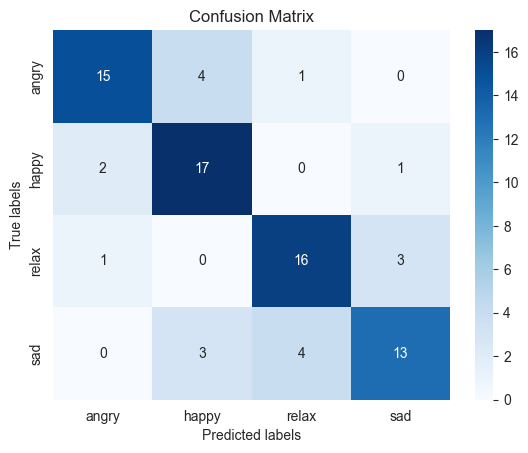

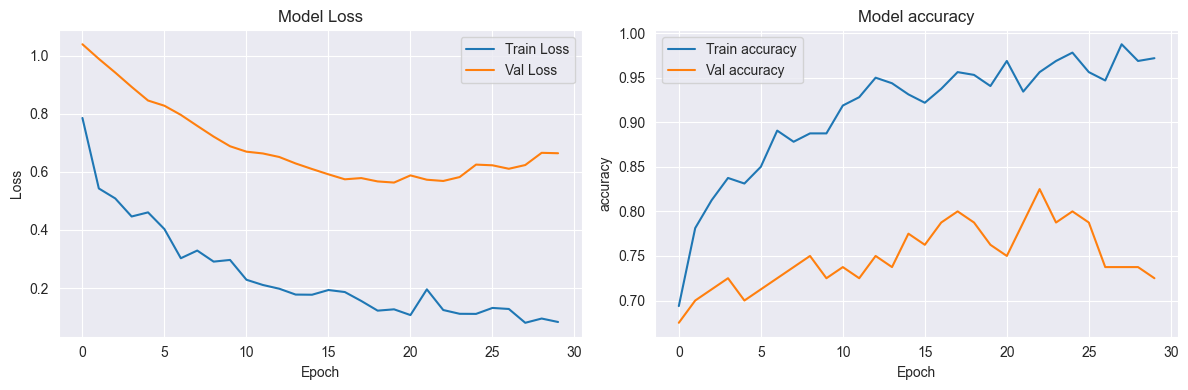

In [64]:
music_tools.show_classification_results(y_pred, y_test, le)
music_tools.plot_trainig_history(history)

In [58]:
single_audio_path = "C:\\Users\\Gabi\\.cache\\kagglehub\\datasets\\imsparsh\\deam-mediaeval-dataset-emotional-analysis-in-music\\versions\\1\\DEAM_audio\\MEMD_audio\\6.mp3"
single_features = music_tools.extract_features(single_audio_path)
X_single = scaler.transform(pd.DataFrame([single_features]))
y_pred_proba = model.predict(X_single)
y_pred = np.argmax(y_pred_proba)
le.inverse_transform([y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array(['relax'], dtype=object)

Butterworth filter dolnoprzepustowy i górnoprzepustowy - poprawa wyników

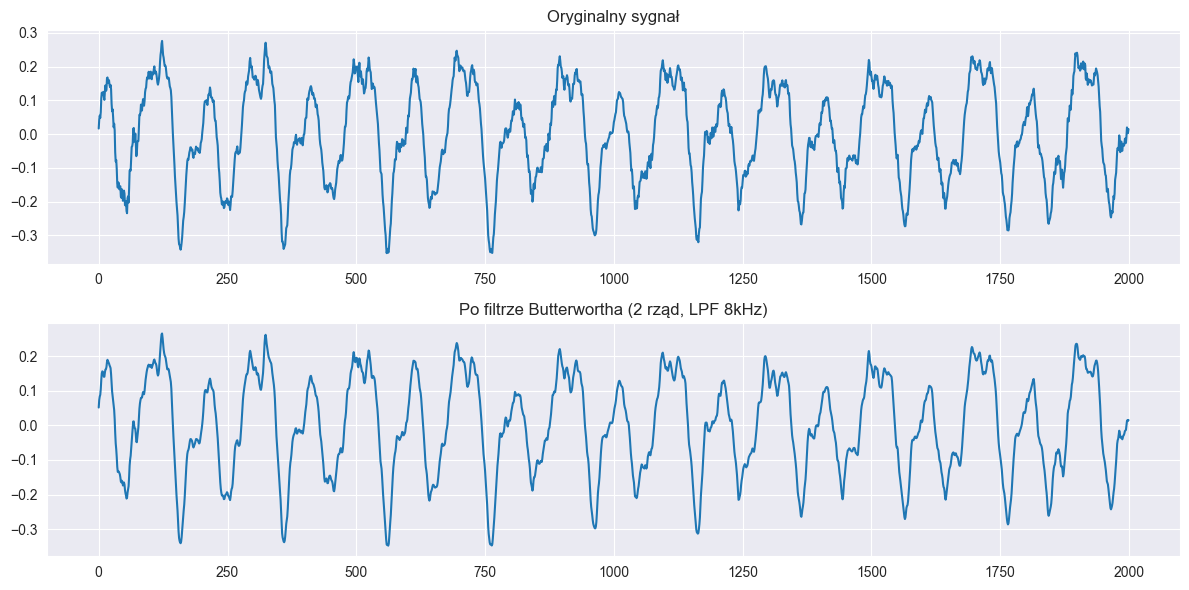

In [108]:
importlib.reload(music_tools)

import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load(df_turkish.path[0], sr=44100)
y_filt = music_tools.butter_filter(y, sr, cutoff_low=100, order=2, btype='high')
y_filt = music_tools.butter_filter(y_filt, sr, cutoff_high=10000, order=2, btype='low')

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(y[:2000])
plt.title("Oryginalny sygnał")

plt.subplot(2,1,2)
plt.plot(y_filt[:2000])
plt.title("Po filtrze Butterwortha (2 rząd, LPF 8kHz)")
plt.tight_layout()
plt.show()


In [6]:
features_list = []
for i, song_path in enumerate(df_turkish['path']):
    extracted = music_tools.extract_features(song_path)
    features_list.append(extracted)
    print(f'{i} / {len(df_turkish)}')

features_df = pd.DataFrame(features_list)
df_turkish_filtered = pd.concat([df_turkish, features_df], axis=1)
df_turkish_filtered

0 / 400
1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400


KeyboardInterrupt: 

In [ ]:
df_turkish_filtered.to_pickle("df_turkish_filtered.pkl")

In [ ]:
df_turkish_filtered = pd.read_pickle("df_turkish_filtered.pkl")

In [120]:
X = df_turkish_filtered.drop(columns=['emotion', 'path'])
y = df_turkish_filtered['emotion']

le = LabelEncoder()
y_en = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42, stratify=y_en)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(320, 32)
(320,)
(80, 32)
(80,)


In [121]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy:  0.7875
              precision    recall  f1-score   support

       angry       0.78      0.90      0.84        20
       happy       0.86      0.90      0.88        20
       relax       0.74      0.70      0.72        20
         sad       0.76      0.65      0.70        20

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.78        80
weighted avg       0.79      0.79      0.78        80



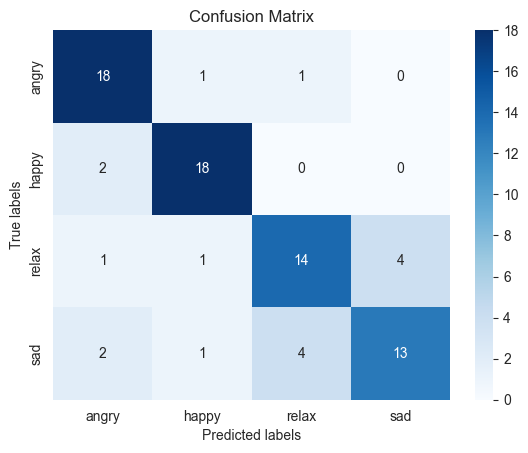

In [122]:
music_tools.show_classification_results(y_pred, y_test, le)

Maksymalne accuracy w artykule dla tego zbioru danych wynosi 79,3%, podczas gdy w tym modelu 81%

In [123]:
num_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1],)

model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,508 (52.77 KB)

 Trainable params: 13,124 (51.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [124]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2504 - loss: 2.2277 - val_accuracy: 0.3875 - val_loss: 1.2973
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4598 - loss: 1.3487 - val_accuracy: 0.6125 - val_loss: 1.0589
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6105 - loss: 0.9595 - val_accuracy: 0.6875 - val_loss: 0.9147
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6742 - loss: 0.8664 - val_accuracy: 0.7000 - val_loss: 0.8318
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7305 - loss: 0.7736 - val_accuracy: 0.7000 - val_loss: 0.7697
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 0.7459 - val_accuracy: 0.7500 - val_loss: 0.7309
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7025 - loss: 0.7018 - val_accuracy: 0.7625 - val_loss: 0.6953
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7613 - loss: 0.6468 - val_accuracy: 0.7750 - 

Accuracy:  0.8125
              precision    recall  f1-score   support

       angry       1.00      0.85      0.92        20
       happy       0.79      0.95      0.86        20
       relax       0.81      0.65      0.72        20
         sad       0.70      0.80      0.74        20

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



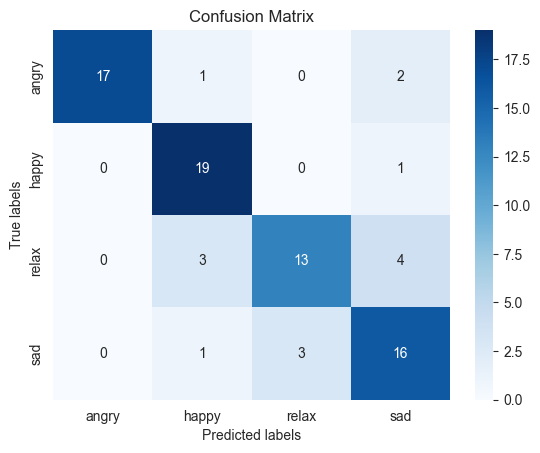

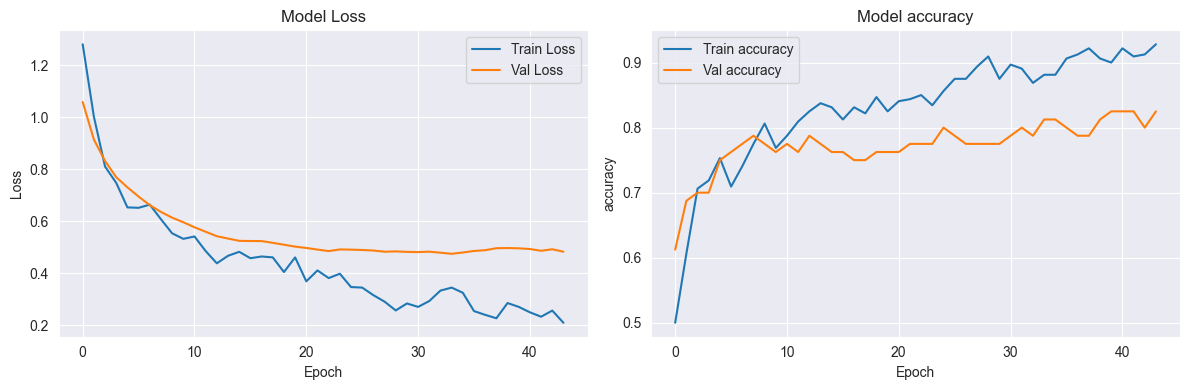

In [125]:
music_tools.show_classification_results(y_pred, y_test, le)
music_tools.plot_trainig_history(history)

Accuracy:  0.7125
              precision    recall  f1-score   support

       angry       0.71      0.85      0.77        20
       happy       0.77      0.85      0.81        20
       relax       0.71      0.50      0.59        20
         sad       0.65      0.65      0.65        20

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



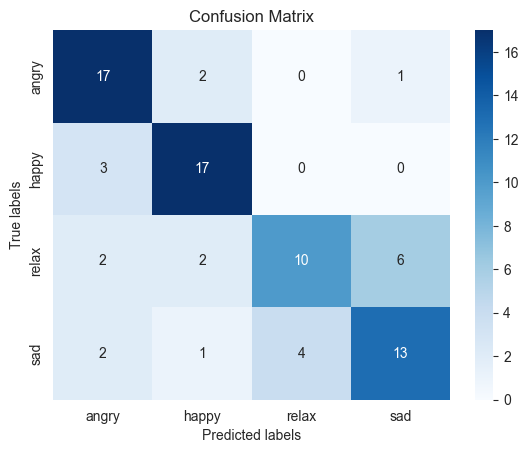

In [126]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
music_tools.show_classification_results(y_pred, y_test, le)

Accuracy:  0.725
              precision    recall  f1-score   support

       angry       0.95      0.90      0.92        20
       happy       0.69      0.90      0.78        20
       relax       0.65      0.65      0.65        20
         sad       0.60      0.45      0.51        20

    accuracy                           0.72        80
   macro avg       0.72      0.73      0.72        80
weighted avg       0.72      0.72      0.72        80



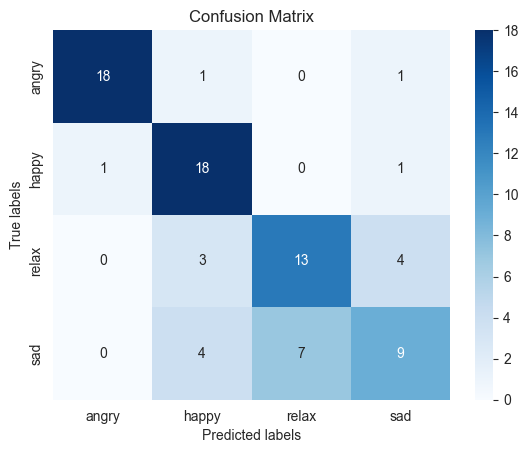

In [127]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(C=10.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
music_tools.show_classification_results(y_pred, y_test, le)

Klasyfikacja na podstawie melspektrogramów

In [5]:
importlib.reload(music_tools)
X = []
y = []

i = 0
for _, row in df_turkish.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X.extend(specs)
    y.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(df_turkish)}')
    i += 1

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

0 / 400
1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400


In [6]:
le = LabelEncoder()
y_en = le.fit_transform(y)
y_cat = to_categorical(y_en)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1912, 128, 216, 1)
(1912, 4)
(478, 128, 216, 1)
(478, 4)


In [138]:
input_shape = X_train.shape[1:]
num_classes = y_cat.shape[1]

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 214, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 107, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 63, 107, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 105, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 30, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 30, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 99840)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │    12,779,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,799,364 (48.83 MB)

 Trainable params: 12,799,172 (48.82 MB)

 Non-trainable params: 192 (768.00 B)

In [139]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - accuracy: 0.4298 - loss: 11.5443 - val_accuracy: 0.2490 - val_loss: 7.2656
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 320ms/step - accuracy: 0.4514 - loss: 1.2625 - val_accuracy: 0.2510 - val_loss: 24.3973
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 263ms/step - accuracy: 0.5275 - loss: 1.1220 - val_accuracy: 0.2510 - val_loss: 31.8329
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.5447 - loss: 1.1497 - val_accuracy: 0.2510 - val_loss: 37.9201
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.5820 - loss: 0.9547 - val_accuracy: 0.2510 - val_loss: 42.8544
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 282ms/step - accuracy: 0.6609 - loss: 0.8213 - val_accuracy: 0.2510 - val_loss: 50.3641
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 319ms/step - accuracy: 0.7011 - loss: 0.7075 - val_accuracy: 0.2510 - val_loss: 63.7321
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.6691 - loss: 0.7490 - v

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Accuracy:  0.6548117154811716
              precision    recall  f1-score   support

       angry       0.99      0.65      0.78       120
       happy       1.00      0.39      0.56       119
       relax       0.51      0.89      0.65       119
         sad       0.56      0.69      0.62       120

    accuracy                           0.65       478
   macro avg       0.77      0.65      0.65       478
weighted avg       0.77      0.65      0.65       478



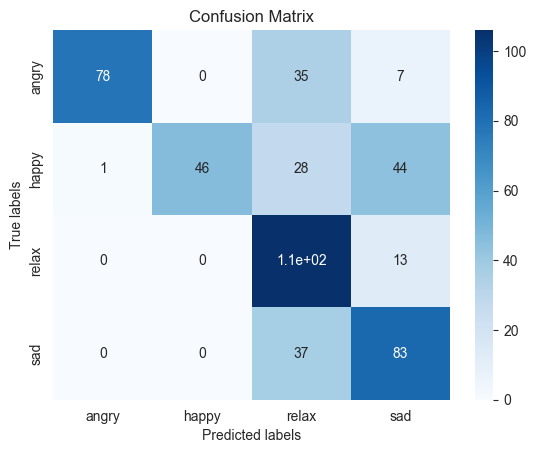

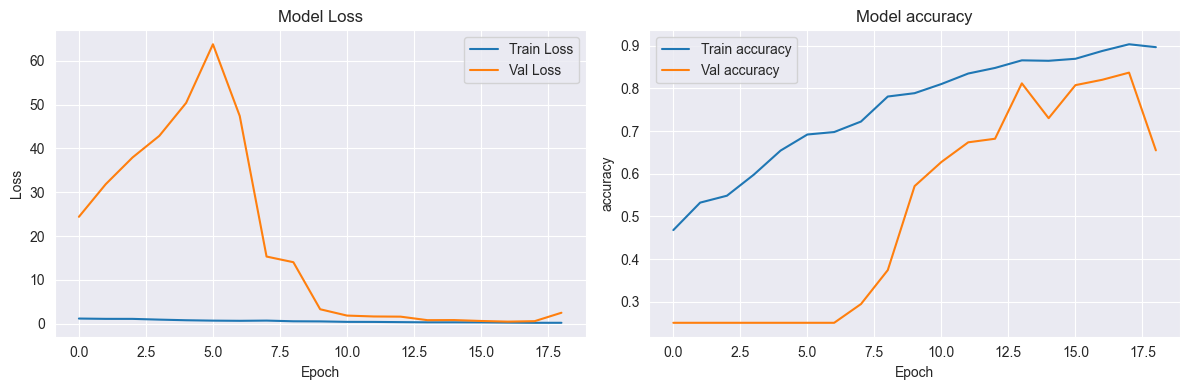

In [140]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

Uczenie transferowe z wykorzystaniem modelu ResNet50

In [8]:
X_rgb = music_tools.melspectrogram_to_rgb(X)

In [9]:
X_rgb = preprocess_input(X_rgb)
y_cnn = to_categorical(y_en)

X_train, X_test, y_train, y_test = train_test_split(X_rgb, y_cnn, stratify=y_en, test_size=0.2, random_state=42)

In [143]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_13[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [144]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/30


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_117']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5172 - loss: 1.3228 - val_accuracy: 0.7258 - val_loss: 0.5917
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7699 - loss: 0.5905 - val_accuracy: 0.8277 - val_loss: 0.5025
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.8182 - loss: 0.4461 - val_accuracy: 0.8303 - val_loss: 0.4289
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8245 - loss: 0.4307 - val_accuracy: 0.8538 - val_loss: 0.4018
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8559 - loss: 0.3742 - val_accuracy: 0.8486 - val_loss: 0.3896
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8562 - loss: 0.3687 - val_accuracy: 0.8668 - val_loss: 0.3437
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8471 - loss: 0.3594 - val_accuracy: 0.8590 - val_loss: 0.3399
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8711 - loss: 0.3433 - val_accuracy: 0.8538 - val_loss: 0.3530


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_117']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


14/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_117']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Accuracy:  0.893305439330544
              precision    recall  f1-score   support

       angry       0.96      0.96      0.96       120
       happy       0.93      0.97      0.95       119
       relax       0.89      0.78      0.83       119
         sad       0.79      0.87      0.83       120

    accuracy                           0.89       478
   macro avg       0.90      0.89      0.89       478
weighted avg       0.90      0.89      0.89       478



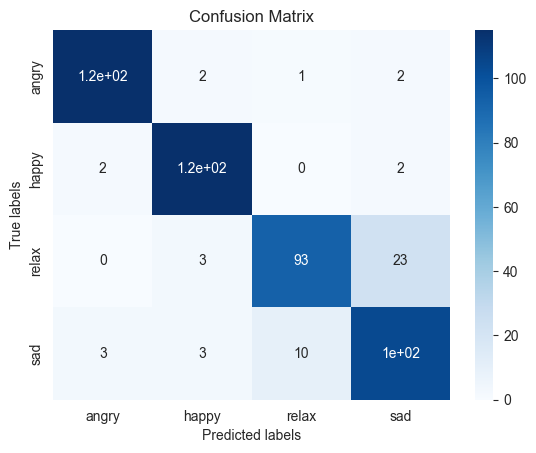

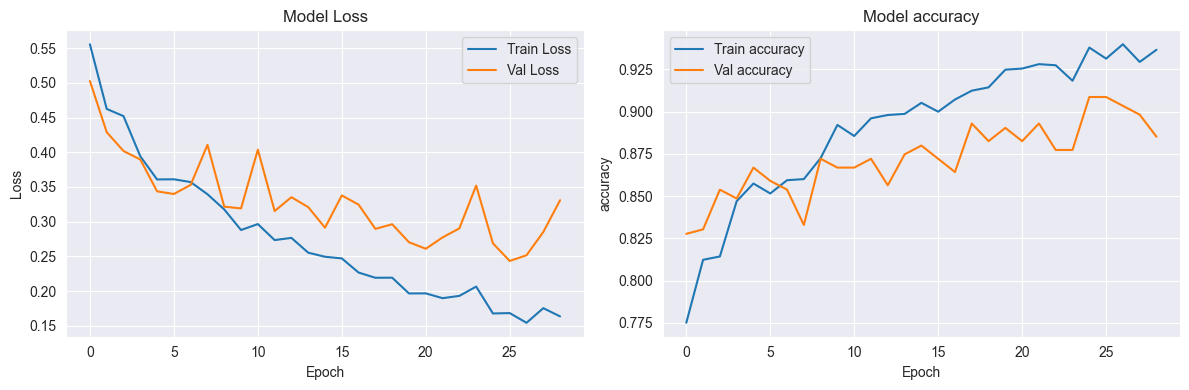

In [145]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [10]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5370 - loss: 1.1404 - val_accuracy: 0.8251 - val_loss: 0.4916
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7988 - loss: 0.5279 - val_accuracy: 0.8407 - val_loss: 0.4684
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8066 - loss: 0.4751 - val_accuracy: 0.8512 - val_loss: 0.3928
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8266 - loss: 0.4311 - val_accuracy: 0.8642 - val_loss: 0.3916
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8332 - loss: 0.4210 - val_accuracy: 0.8642 - val_loss: 0.3539
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8639 - loss: 0.3616 - val_accuracy: 0.8695 - val_loss: 0.3505
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8604 - loss: 0.3754 - val_accuracy: 0.8329 - val_loss: 0.4174
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8547 - loss: 0.3525 - val_accuracy: 0.8538 - val_los

15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Accuracy:  0.8619246861924686
              precision    recall  f1-score   support

       angry       0.93      0.95      0.94       120
       happy       0.90      0.96      0.93       119
       relax       0.82      0.82      0.82       119
         sad       0.78      0.72      0.75       120

    accuracy                           0.86       478
   macro avg       0.86      0.86      0.86       478
weighted avg       0.86      0.86      0.86       478



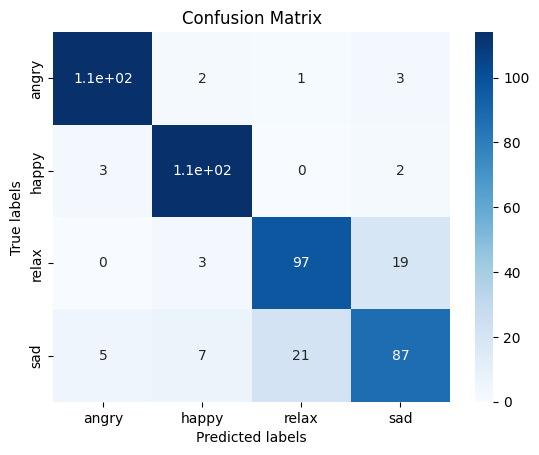

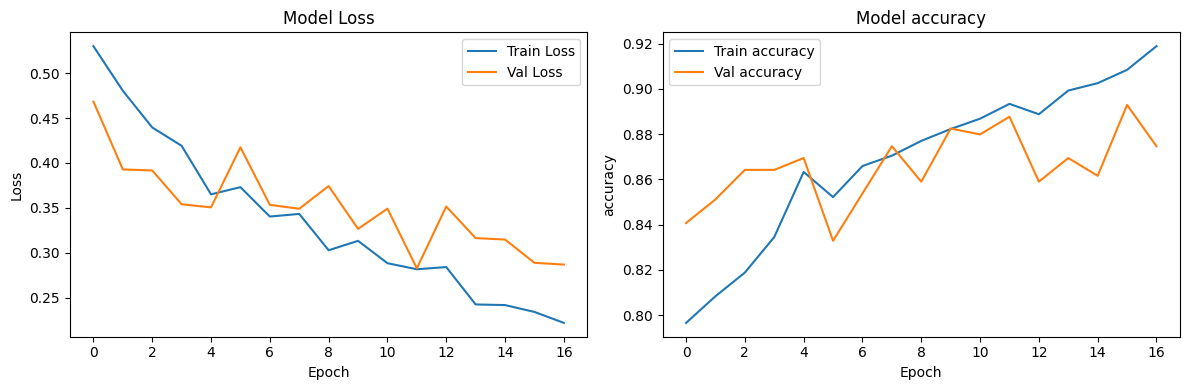

In [12]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [13]:
model.save('turkish_mel_model.keras')

In [157]:
specs = music_tools.extract_melspectrogram_segments("C:\\Users\\Gabi\\.cache\\kagglehub\\datasets\\imsparsh\\deam-mediaeval-dataset-emotional-analysis-in-music\\versions\\1\\DEAM_audio\\MEMD_audio\\32.mp3", sr=sr, segment_duration=5)
X_song = np.array(specs)
X_song_rgb = music_tools.melspectrogram_to_rgb(X_song)

preds_proba = model.predict(X_song_rgb)
preds_class = np.argmax(preds_proba, axis=1)

majority_class = np.bincount(preds_class).argmax()

avg_proba = np.mean(preds_proba, axis=0)
avg_class = np.argmax(avg_proba)

final_class_majority = le.inverse_transform([majority_class])[0]
final_class_avg = le.inverse_transform([avg_class])[0]

print(f"majority_vote: {final_class_majority}")
print(f"average_proba: {final_class_avg}")
print(f"pred_per_segment: {le.inverse_transform(preds_class)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
majority_vote: angry
average_proba: angry
pred_per_segment: ['angry' 'sad' 'relax' 'angry' 'angry' 'relax' 'angry' 'angry' 'angry']


In [12]:
from keras.applications import VGG16

vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/30


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_175']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.3711 - loss: 2.7289 - val_accuracy: 0.7859 - val_loss: 0.5955
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.6539 - loss: 0.9631 - val_accuracy: 0.7937 - val_loss: 0.6004
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 270s 6s/step - accuracy: 0.6920 - loss: 0.8367 - val_accuracy: 0.8068 - val_loss: 0.5099
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.7040 - loss: 0.7630 - val_accuracy: 0.8120 - val_loss: 0.5018
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.7216 - loss: 0.6550 - val_accuracy: 0.8303 - val_loss: 0.4480
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 236s 5s/step - accuracy: 0.7355 - loss: 0.6989 - val_accuracy: 0.8146 - val_loss: 0.4797
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.7864 - loss: 0.5927 - val_accuracy: 0.8277 - val_loss: 0.4419
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 220s 5s/step - accuracy: 0.7980 - loss: 0.5610 - val_accuracy: 0.8407 - val_loss: 0.

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_175']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


14/15 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_175']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step
Accuracy:  0.8410041841004184
              precision    recall  f1-score   support

       angry       0.92      0.98      0.95       120
       happy       0.91      0.87      0.89       119
       relax       0.81      0.80      0.80       119
         sad       0.72      0.72      0.72       120

    accuracy                           0.84       478
   macro avg       0.84      0.84      0.84       478
weighted avg       0.84      0.84      0.84       478



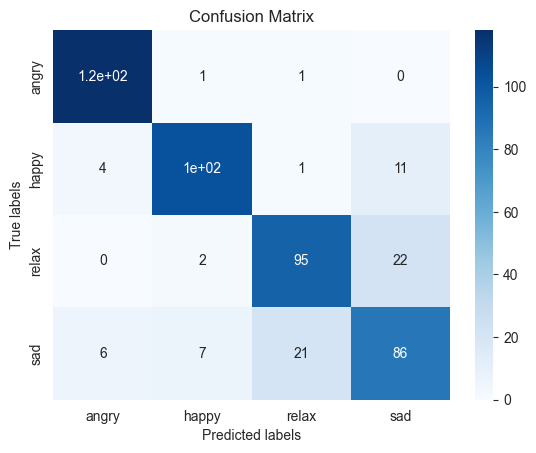

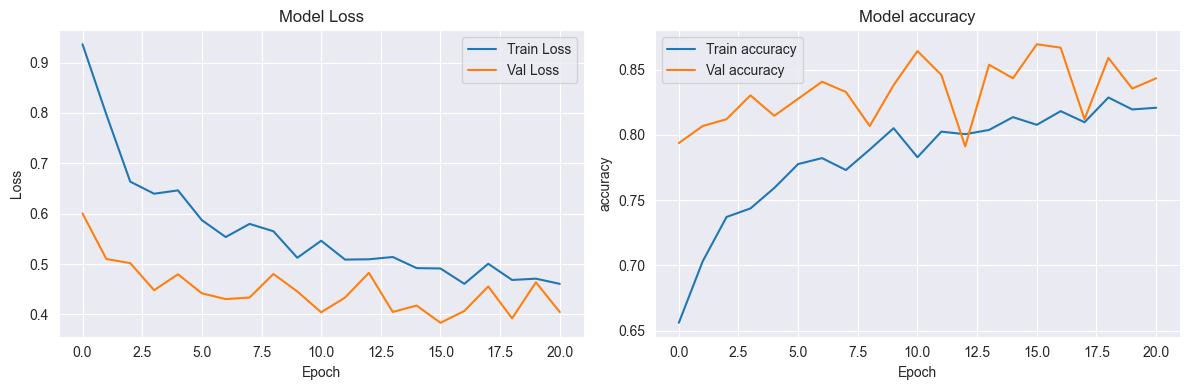

In [14]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [17]:
from keras.src import optimizers

vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-5), metrics=["accuracy"])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,692,612 (105.64 MB)

 Trainable params: 12,977,924 (49.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/50


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_246']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


60/60 ━━━━━━━━━━━━━━━━━━━━ 276s 5s/step - accuracy: 0.4800 - loss: 3.1514 - val_accuracy: 0.8033 - val_loss: 0.6632
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 281s 5s/step - accuracy: 0.7939 - loss: 0.7407 - val_accuracy: 0.8222 - val_loss: 0.5261
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 480s 8s/step - accuracy: 0.8600 - loss: 0.4362 - val_accuracy: 0.8368 - val_loss: 0.4604
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 514s 9s/step - accuracy: 0.8953 - loss: 0.2881 - val_accuracy: 0.8368 - val_loss: 0.5084
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 345s 6s/step - accuracy: 0.9273 - loss: 0.2158 - val_accuracy: 0.8452 - val_loss: 0.5118
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - accuracy: 0.9371 - loss: 0.1846 - val_accuracy: 0.8661 - val_loss: 0.4142
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 440s 7s/step - accuracy: 0.9465 - loss: 0.1230 - val_accuracy: 0.8452 - val_loss: 0.5444
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 385s 6s/step - accuracy: 0.9562 - loss: 0.1193 - val_accuracy: 0.8703 - val_loss: 0.

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_246']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


14/15 ━━━━━━━━━━━━━━━━━━━━ 7s 8s/step 

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_246']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 116s 8s/step
Accuracy:  0.8661087866108786
              precision    recall  f1-score   support

       angry       0.93      0.93      0.93       120
       happy       0.95      0.87      0.91       119
       relax       0.85      0.81      0.83       119
         sad       0.76      0.85      0.80       120

    accuracy                           0.87       478
   macro avg       0.87      0.87      0.87       478
weighted avg       0.87      0.87      0.87       478



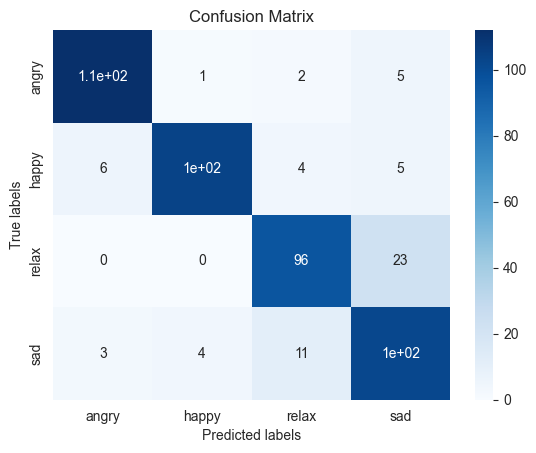

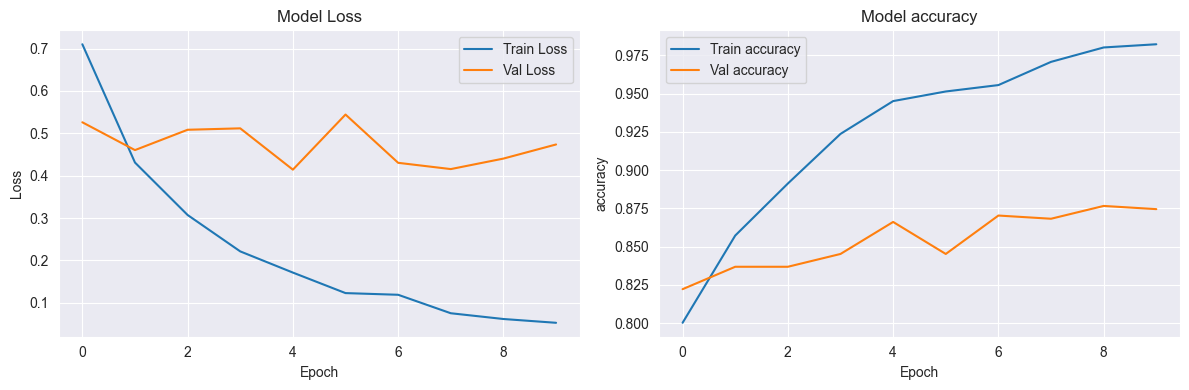

In [19]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [20]:
from tensorflow.keras.applications import EfficientNetB7

base_model = EfficientNetB7(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 64,754,331 (247.02 MB)

 Trainable params: 656,644 (2.50 MB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
        callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/30


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_270']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.3660 - loss: 1.3015 - val_accuracy: 0.6684 - val_loss: 0.9659
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.6142 - loss: 0.9669 - val_accuracy: 0.7285 - val_loss: 0.7971
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.6820 - loss: 0.8327 - val_accuracy: 0.7180 - val_loss: 0.7390
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 230s 5s/step - accuracy: 0.7044 - loss: 0.7810 - val_accuracy: 0.7441 - val_loss: 0.6705
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.6928 - loss: 0.7593 - val_accuracy: 0.7702 - val_loss: 0.6301
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.7440 - loss: 0.6879 - val_accuracy: 0.7702 - val_loss: 0.6111
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.7302 - loss: 0.6741 - val_accuracy: 0.7781 - val_loss: 0.5831
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.7618 - loss: 0.6399 - val_accuracy: 0.7728 - val_loss: 0.

KeyboardInterrupt: 

In [22]:
vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,879,428 (56.76 MB)

 Trainable params: 164,740 (643.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
        callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/30


C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1089']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.3898 - loss: 2.1927 - val_accuracy: 0.6841 - val_loss: 0.7876
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 263s 6s/step - accuracy: 0.5828 - loss: 1.0769 - val_accuracy: 0.7546 - val_loss: 0.6577
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.6560 - loss: 0.8949 - val_accuracy: 0.6867 - val_loss: 0.7351
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 296s 6s/step - accuracy: 0.6462 - loss: 0.8527 - val_accuracy: 0.7885 - val_loss: 0.5944
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 0.6867 - loss: 0.7561 - val_accuracy: 0.7520 - val_loss: 0.6057
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.7019 - loss: 0.7296 - val_accuracy: 0.7493 - val_loss: 0.5775
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 374s 8s/step - accuracy: 0.7254 - loss: 0.7100 - val_accuracy: 0.7807 - val_loss: 0.5366
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 298s 6s/step - accuracy: 0.7447 - loss: 0.6768 - val_accuracy: 0.7337 - val_loss: 0.

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1089']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


14/15 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1089']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step
Accuracy:  0.8619246861924686
              precision    recall  f1-score   support

       angry       0.94      0.97      0.96       120
       happy       0.90      0.94      0.92       119
       relax       0.84      0.77      0.80       119
         sad       0.76      0.76      0.76       120

    accuracy                           0.86       478
   macro avg       0.86      0.86      0.86       478
weighted avg       0.86      0.86      0.86       478



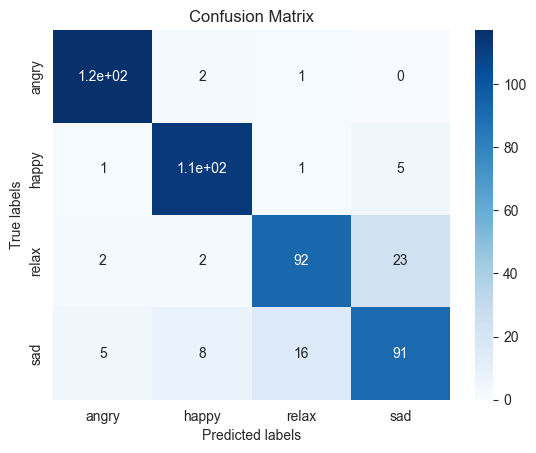

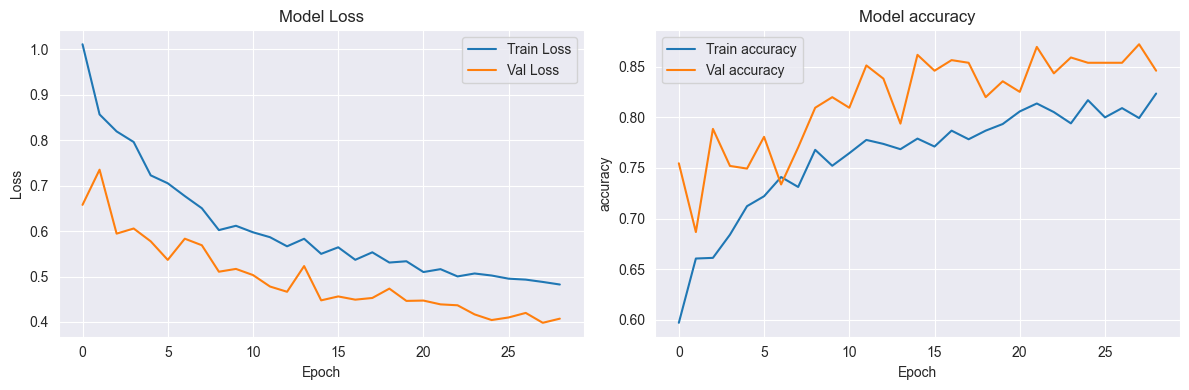

In [24]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [ ]:
# base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# for layer in base_model.layers:
#     layer.trainable = False
#
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
# output = Dense(y_train.shape[1], activation='softmax')(x)
#
# model = Model(inputs=base_model.input, outputs=output)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#
# model.summary()

In [23]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.3)(x)
# x = Dense(128, activation='relu')(x)
# output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [25]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,  # 10
    batch_size=32,
        callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),   # 3
    ]
)

Epoch 1/30
48/48 [==============================] - 100s 2s/step - loss: 0.8709 - accuracy: 0.6632 - val_loss: 0.4817 - val_accuracy: 0.8198
Epoch 2/30
48/48 [==============================] - 92s 2s/step - loss: 0.5321 - accuracy: 0.7894 - val_loss: 0.4197 - val_accuracy: 0.8486
Epoch 3/30
48/48 [==============================] - 109s 2s/step - loss: 0.4763 - accuracy: 0.8025 - val_loss: 0.3784 - val_accuracy: 0.8616
Epoch 4/30
48/48 [==============================] - 208s 4s/step - loss: 0.4376 - accuracy: 0.8411 - val_loss: 0.3889 - val_accuracy: 0.8512
Epoch 5/30
48/48 [==============================] - 206s 4s/step - loss: 0.3963 - accuracy: 0.8358 - val_loss: 0.4211 - val_accuracy: 0.8198
Epoch 6/30
48/48 [==============================] - 206s 4s/step - loss: 0.3711 - accuracy: 0.8528 - val_loss: 0.3557 - val_accuracy: 0.8721
Epoch 7/30
48/48 [==============================] - 147s 3s/step - loss: 0.3683 - accuracy: 0.8666 - val_loss: 0.4732 - val_accuracy: 0.8094
Epoch 8/30
48/

15/15 [==============================] - 28s 2s/step
Accuracy:  0.8786610878661087
              precision    recall  f1-score   support

       angry       0.93      0.96      0.94       120
       happy       0.95      0.96      0.95       119
       relax       0.88      0.74      0.80       119
         sad       0.77      0.86      0.81       120

    accuracy                           0.88       478
   macro avg       0.88      0.88      0.88       478
weighted avg       0.88      0.88      0.88       478



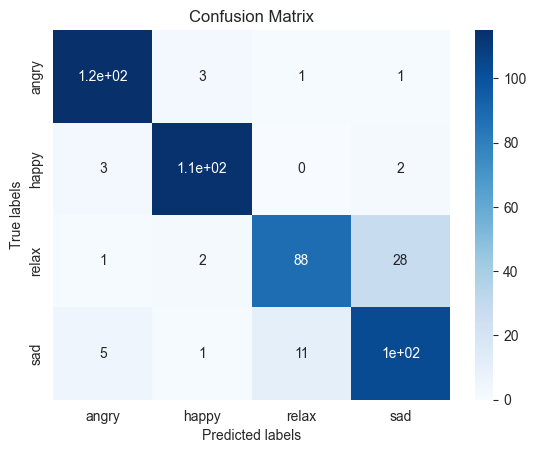

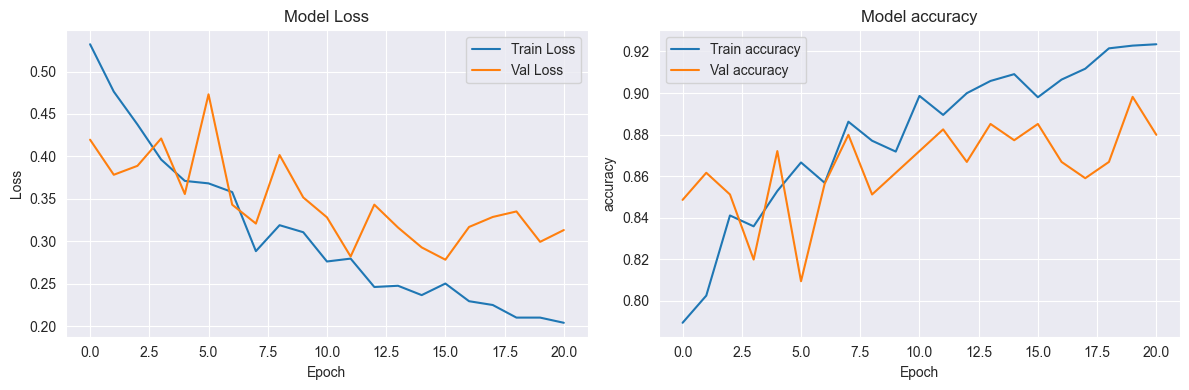

In [26]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [27]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

# model.compile(
#     optimizer=Adam(1e-5),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [28]:
import tensorflow_addons as tfa

model.compile(
    optimizer=Adam(1e-5),
    loss=tfa.losses.SigmoidFocalCrossEntropy(),
    metrics=['accuracy']
)

In [ ]:
# y_train_labels = np.argmax(y_train, axis=1)
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train_labels),
#     y=y_train_labels
# )
# class_weights = dict(enumerate(class_weights))
#
# history_finetune = model.fit(
#     X_train, y_train,
#     validation_split=0.2,
#     epochs=20,
#     batch_size=32,
#     class_weight=class_weights,
#     callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
# )

In [29]:
history_finetune_focal = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/20
48/48 [==============================] - 155s 3s/step - loss: 0.7458 - accuracy: 0.7541 - val_loss: 0.1874 - val_accuracy: 0.8564
Epoch 2/20
48/48 [==============================] - 152s 3s/step - loss: 0.2929 - accuracy: 0.8300 - val_loss: 0.2322 - val_accuracy: 0.8668
Epoch 3/20
48/48 [==============================] - 155s 3s/step - loss: 0.2059 - accuracy: 0.8744 - val_loss: 0.2220 - val_accuracy: 0.8721
Epoch 4/20
48/48 [==============================] - 155s 3s/step - loss: 0.2088 - accuracy: 0.8908 - val_loss: 0.2180 - val_accuracy: 0.8773
Epoch 5/20
48/48 [==============================] - 156s 3s/step - loss: 0.1163 - accuracy: 0.9111 - val_loss: 0.2262 - val_accuracy: 0.8773
Epoch 6/20
48/48 [==============================] - 157s 3s/step - loss: 0.0972 - accuracy: 0.9287 - val_loss: 0.2322 - val_accuracy: 0.8825


15/15 [==============================] - 29s 2s/step
Accuracy:  0.8389121338912134
              precision    recall  f1-score   support

       angry       0.93      0.96      0.95       120
       happy       0.93      0.95      0.94       119
       relax       0.93      0.54      0.68       119
         sad       0.66      0.91      0.76       120

    accuracy                           0.84       478
   macro avg       0.86      0.84      0.83       478
weighted avg       0.86      0.84      0.83       478



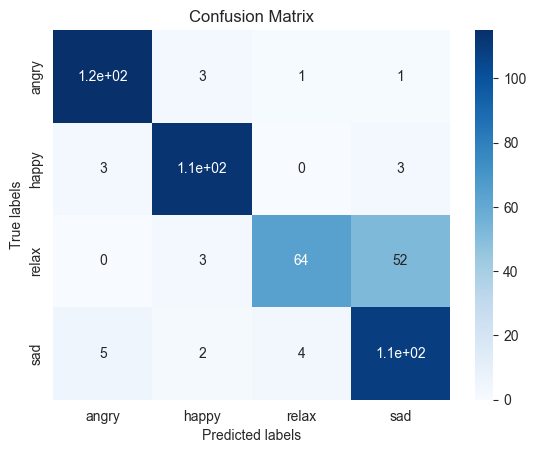

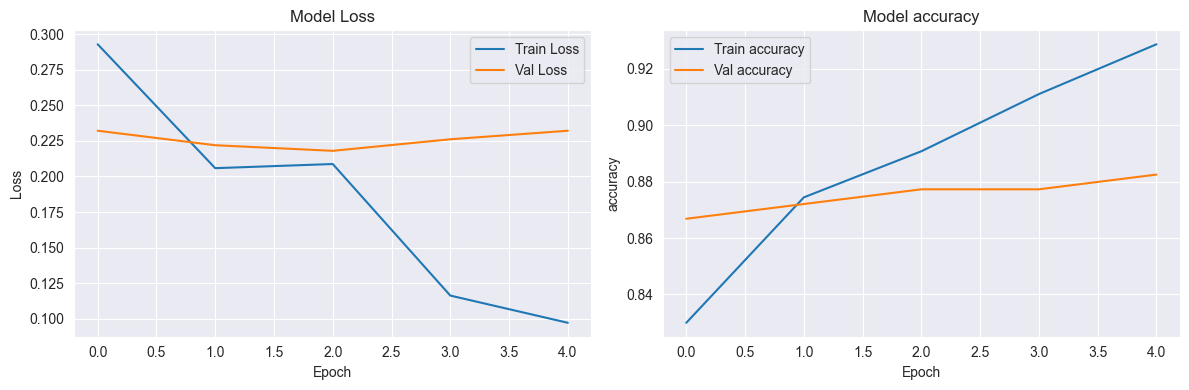

In [30]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history_finetune_focal)

Najlepsze wyniki za pomocą modelu ResNet50 bez fintuningu - 89%.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [14]:
model = load_model('models/turkish_mel_model.keras')

In [15]:
specs = music_tools.extract_melspectrogram_segments("C:\\Users\\Gabi\\.cache\\kagglehub\\datasets\\blaler\\turkish-music-emotion-dataset\\versions\\3\\sad\\eledim_eledim_eda_karaytug.mp3", segment_duration=5)
X_song = np.array(specs)
X_song_rgb = music_tools.melspectrogram_to_rgb(X_song)

preds_proba = model.predict(X_song_rgb)
preds_class = np.argmax(preds_proba, axis=1)

majority_class = np.bincount(preds_class).argmax()

avg_proba = np.mean(preds_proba, axis=0)
avg_class = np.argmax(avg_proba)

final_class_majority = le.inverse_transform([majority_class])[0]
final_class_avg = le.inverse_transform([avg_class])[0]

print(f"majority_vote: {final_class_majority}")
print(f"average_proba: {final_class_avg}")
print(f"pred_per_segment: {le.inverse_transform(preds_class)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
majority_vote: sad
average_proba: sad
pred_per_segment: ['sad' 'angry' 'sad' 'sad' 'sad' 'relax']


Podział na zbiór uczący i testujący wg id utworów

In [16]:
train_df, test_df, _, _ = train_test_split(df_turkish, df_turkish['emotion'], stratify=df_turkish['emotion'], test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(320, 34)
(80, 34)


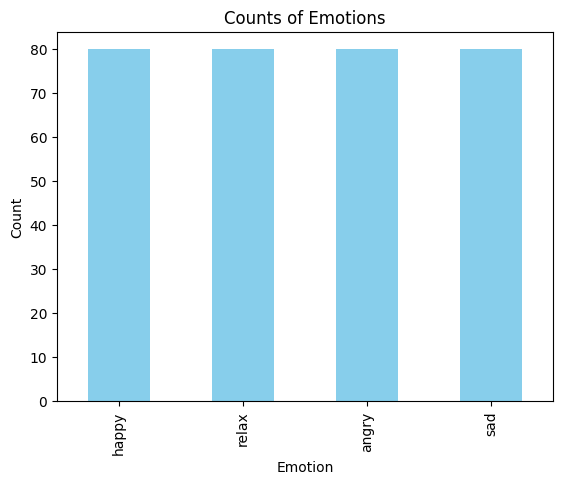

In [17]:
music_tools.show_class_proportions(train_df.emotion)

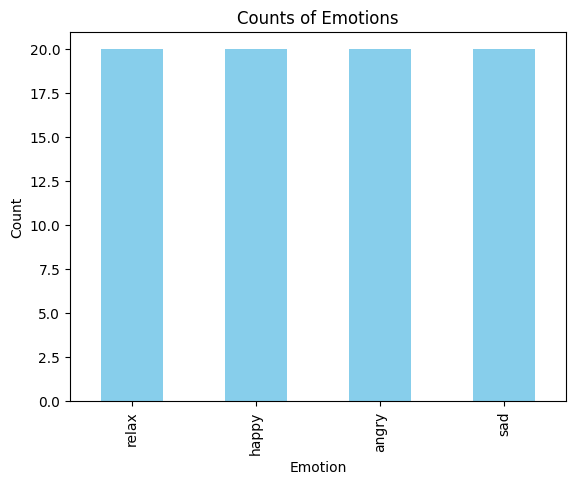

In [18]:
music_tools.show_class_proportions(test_df.emotion)

In [19]:
importlib.reload(music_tools)
X_train, y_train, X_test, y_test = [], [], [], []

i = 1
for _, row in train_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_train.extend(specs)
    y_train.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df)}')
    i += 1

for _, row in test_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_test.extend(specs)
    y_test.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df)}')
    i += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [20]:
le_train = LabelEncoder()
y_train_en = le_train.fit_transform(y_train)
y_train_cnn = to_categorical(y_train_en)

le_test = LabelEncoder()
y_test_en = le_test.fit_transform(y_test)
y_test_cnn = to_categorical(y_test_en)

In [21]:
X_train_rgb = music_tools.melspectrogram_to_rgb(X_train)
X_train_rgb = preprocess_input(X_train_rgb)

X_test_rgb = music_tools.melspectrogram_to_rgb(X_test)
X_test_rgb = preprocess_input(X_test_rgb)

In [25]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,145,668 (92.11 MB)

 Trainable params: 557,956 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [26]:
history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4944 - loss: 1.2418 - val_accuracy: 0.8277 - val_loss: 0.4617
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7324 - loss: 0.6821 - val_accuracy: 0.7885 - val_loss: 0.5479
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7575 - loss: 0.6158 - val_accuracy: 0.8198 - val_loss: 0.4836
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.7921 - loss: 0.5211 - val_accuracy: 0.8381 - val_loss: 0.4123
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8159 - loss: 0.4729 - val_accuracy: 0.8225 - val_loss: 0.4794
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.8201 - loss: 0.4532 - val_accuracy: 0.8303 - val_loss: 0.4669
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.8407 - loss: 0.4093 - val_accuracy: 0.7990 - val_loss: 0.5178
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8417 - loss: 0.3830 - val_accuracy: 0.8225 - val_lo

15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step
Accuracy:  0.8214285714285714
              precision    recall  f1-score   support

       angry       0.92      0.92      0.92       119
       happy       0.89      0.91      0.90       120
       relax       0.91      0.57      0.70       117
         sad       0.65      0.88      0.75       120

    accuracy                           0.82       476
   macro avg       0.84      0.82      0.82       476
weighted avg       0.84      0.82      0.82       476



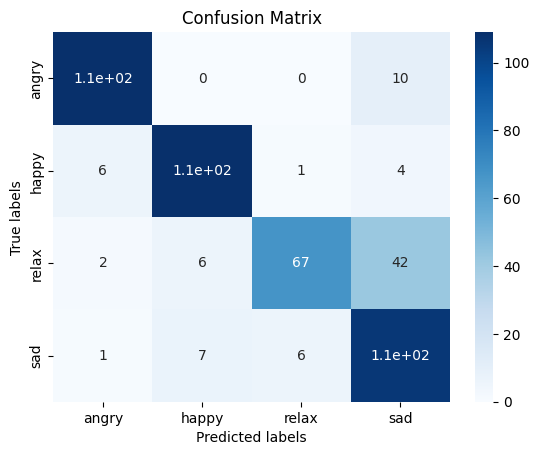

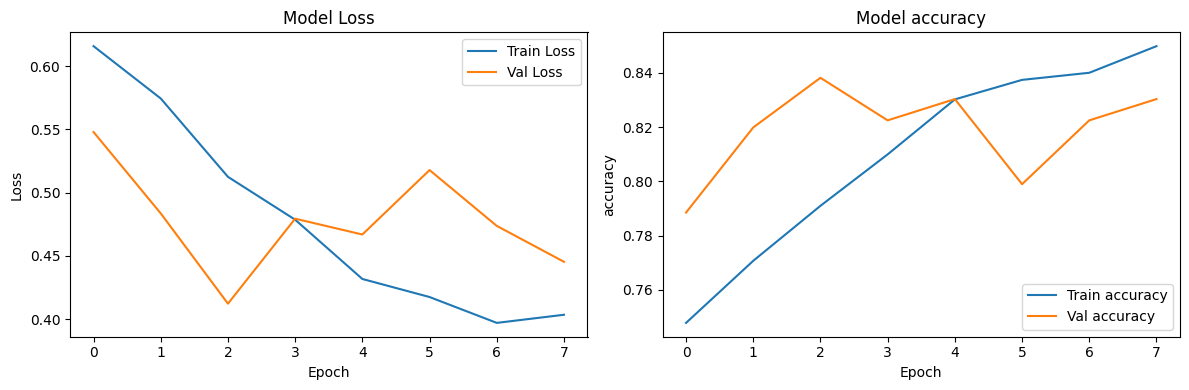

In [27]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)

In [28]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
    ]
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.7144 - loss: 0.7451 - val_accuracy: 0.8460 - val_loss: 0.4243
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.8389 - loss: 0.4282 - val_accuracy: 0.8460 - val_loss: 0.4157
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.8878 - loss: 0.3092 - val_accuracy: 0.8433 - val_loss: 0.3948
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.9058 - loss: 0.2573 - val_accuracy: 0.8564 - val_loss: 0.3822
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9303 - loss: 0.2056 - val_accuracy: 0.8616 - val_loss: 0.3764
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9475 - loss: 0.1612 - val_accuracy: 0.8590 - val_loss: 0.3837
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9565 - loss: 0.1385 - val_accuracy: 0.8538 - val_loss: 0.3907
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9725 - loss: 0.0956 - val_accuracy: 0.8486 - v

15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Accuracy:  0.8466386554621849
              precision    recall  f1-score   support

       angry       0.96      0.92      0.94       119
       happy       0.90      0.96      0.93       120
       relax       0.83      0.68      0.75       117
         sad       0.71      0.82      0.76       120

    accuracy                           0.85       476
   macro avg       0.85      0.85      0.85       476
weighted avg       0.85      0.85      0.85       476



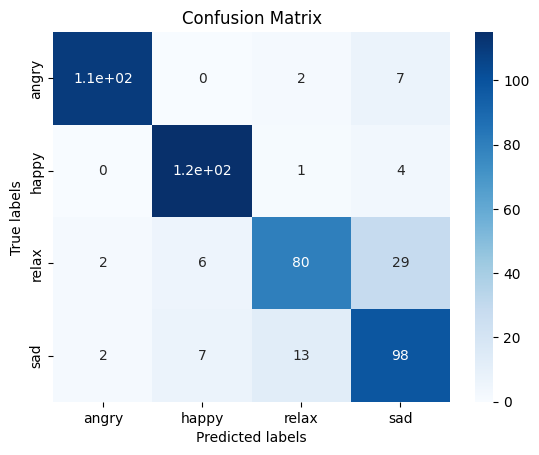

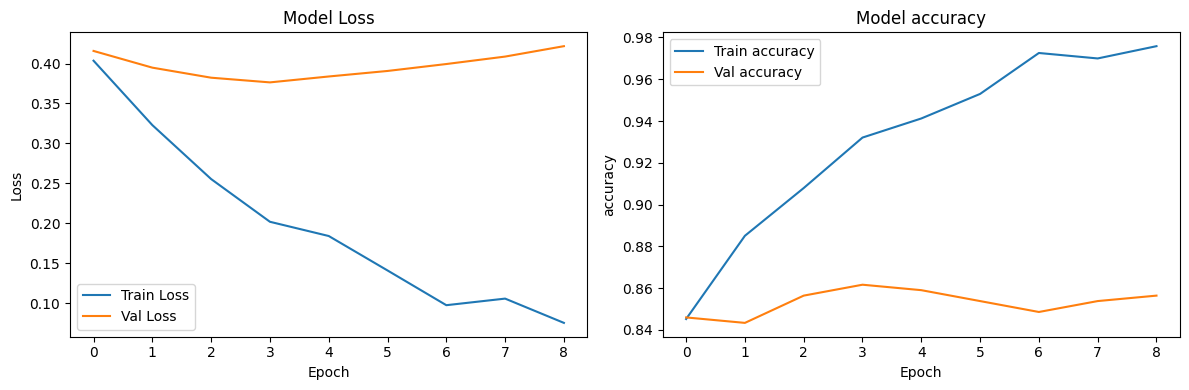

In [30]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le)
music_tools.plot_trainig_history(history)